<a href="https://colab.research.google.com/github/hazelliang/Python-Machine-Learning-Project/blob/master/Oscars%20Best%20Picture%20Winner%202019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Oscars Best Picture Winner

Questions:
*  What kind of movies win Best Picture?
*  Do Best Picture winning movies also make money?
*  Are Best Picture winners popular?

## Ingest

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import data

Data source: https://datahub.io/rufuspollock/oscars-nominees-and-winners#data

https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset

In [0]:
Oscars = pd.read_csv('https://pkgstore.datahub.io/36661def37f62e4130670ab75e06465a/oscars-nominees-and-winners/data_csv/data/a269d213f6ac52125b7430b9c08b1591/data_csv.csv')

In [0]:
##Oscars Award information from 1927-2015
Oscars.head()

year category  winner               entity
0  1927    ACTOR   False  Richard Barthelmess
1  1927    ACTOR    True        Emil Jannings
2  1927  ACTRESS   False       Louise Dresser
3  1927  ACTRESS    True         Janet Gaynor
4  1927  ACTRESS   False       Gloria Swanson

In [0]:
movie = pd.read_csv('https://raw.githubusercontent.com/hazelliang/imdb/master/IMDB.csv')

In [0]:
## 5000 IMDB dataset contains movie detailed information, box office and social media influence 
movie.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

### Clean

*   Drop unnecessary columns
*   Filter Oscars Best Picture nominations and winners
*   Merge two datasets
*   Remove remade movies(same name but from different years)




In [0]:
movie = movie.drop(['color', 'movie_imdb_link', 'aspect_ratio', 'actor_3_name', 'actor_2_name', 'actor_1_name'], axis=1)

In [0]:
movie.rename(columns={'director_name': 'director', 'movie_title': 'movie'}, inplace=True)

In [0]:
## Best Picture
Oscars = Oscars[(Oscars['category']=='OUTSTANDING PRODUCTION') | (Oscars['category']=='OUTSTANDING PICTURE') | (Oscars['category']=='OUTSTANDING MOTION PICTURE') | (Oscars['category']=='BEST MOTION PICTURE') | (Oscars['category']=='BEST PICTURE')]

In [0]:
Oscars.winner[Oscars['winner'] == False] = 0

In [0]:
Oscars.rename(columns={'category': 'award', 'entity': 'movie'}, inplace=True)

In [0]:
print(Oscars.info())
print(Oscars.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 19 to 11001
Data columns (total 4 columns):
year      546 non-null int64
award     546 non-null object
winner    546 non-null float64
movie     546 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 21.3+ KB
None
    year                award  winner                   movie
19  1927  OUTSTANDING PICTURE     0.0       The Caddo Company
20  1927  OUTSTANDING PICTURE     0.0                     Fox
21  1927  OUTSTANDING PICTURE     1.0  Paramount Famous Lasky
62  1928  OUTSTANDING PICTURE     0.0     Feature Productions
63  1928  OUTSTANDING PICTURE     0.0                     Fox


In [0]:
## Merge dataset
oscars_movie = Oscars.merge(movie, on = 'movie',how = 'outer')

In [0]:
oscars_movie = oscars_movie.dropna(how = 'any')
oscars_movie['year'] = oscars_movie.year.astype(int)
oscars_movie = oscars_movie.sort_values('year', axis=0, ascending=True, inplace=False)

In [0]:
## Get rid of remade movies
oscars_movie = oscars_movie[oscars_movie['year'] == oscars_movie['title_year']]

In [0]:
## Reset index
oscars_movie = oscars_movie.reset_index()
oscars_movie = oscars_movie.drop('index', axis=1)

In [0]:
## Making a copy
oscars_movie_copy = oscars_movie.copy()

In [0]:
oscars_movie = oscars_movie.drop(['award', 'title_year', 'content_rating'], axis=1)

In [0]:
oscars_movie = oscars_movie[['year','winner','movie','director','gross','budget','duration','language','country','genres','plot_keywords','facenumber_in_poster','imdb_score','num_critic_for_reviews', 'num_voted_users','num_user_for_reviews','movie_facebook_likes','director_facebook_likes','cast_total_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']]

In [0]:
oscars_movie.head()

year  winner                        movie          director        gross  \
0  1935     0.0                      Top Hat     Mark Sandrich    3000000.0   
1  1939     1.0           Gone with the Wind    Victor Fleming  198655278.0   
2  1939     0.0             The Wizard of Oz    Victor Fleming   22202612.0   
3  1946     1.0  The Best Years of Our Lives     William Wyler   23650000.0   
4  1952     1.0   The Greatest Show on Earth  Cecil B. DeMille   36000000.0   

      budget  duration language country                            genres  \
0   609000.0      81.0  English     USA            Comedy|Musical|Romance   
1  3977000.0     226.0  English     USA         Drama|History|Romance|War   
2  2800000.0     102.0  English     USA  Adventure|Family|Fantasy|Musical   
3  2100000.0     172.0  English     USA                 Drama|Romance|War   
4  4000000.0     152.0  English     USA              Drama|Family|Romance   

            ...           imdb_score  num_critic_for_reviews  num_voted_users  \
0           ...                  7.8                    66.0          13269.0   
1           ...                  8.2                   157.0         215340.0   
2           ...                  8.1                   213.0         291875.0   
3           ...                  8.1                    97.0          40359.0   
4           ...                  6.7                    44.0           9456.0   

   num_user_for_reviews  movie_facebook_likes  director_facebook_likes  \
0                  98.0                1000.0                     10.0   
1                 706.0               16000.0                    149.0   
2                 533.0               14000.0                    149.0   
3                 235.0                   0.0                    355.0   
4                 107.0                 625.0                    309.0   

   cast_total_facebook_likes  actor_1_facebook_likes  actor_2_facebook_likes  \
0                      824.0                   610.0                   172.0   
1                     1862.0                   503.0                   384.0   
2                     2509.0                   695.0                   421.0   
3                     1941.0                   749.0                   208.0   
4                      825.0                   232.0                   178.0   

   actor_3_facebook_likes  
0                    23.0  
1                   248.0  
2                   357.0  
3                   188.0  
4                   132.0  

[5 rows x 22 columns]

In [0]:
oscars_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 22 columns):
year                         186 non-null int64
winner                       186 non-null float64
movie                        186 non-null object
director                     186 non-null object
gross                        186 non-null float64
budget                       186 non-null float64
duration                     186 non-null float64
language                     186 non-null object
country                      186 non-null object
genres                       186 non-null object
plot_keywords                186 non-null object
facenumber_in_poster         186 non-null float64
imdb_score                   186 non-null float64
num_critic_for_reviews       186 non-null float64
num_voted_users              186 non-null float64
num_user_for_reviews         186 non-null float64
movie_facebook_likes         186 non-null float64
director_facebook_likes      186 non-null float64
cas

In [0]:
## Making a copy
oscars_movie_copy2 = oscars_movie.copy()

In [0]:
## Winner movies
winner = oscars_movie[oscars_movie['winner'] == 1]

##EDA

### Top 15 Keywords in Best Picture winning movies

In [0]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [0]:
## get keyword
set_keywords = set()
for liste_keywords in winner['plot_keywords'].str.split('|').values:
    if isinstance(liste_keywords, float): continue
    set_keywords = set_keywords.union(liste_keywords)

In [0]:
## get keyword_occurences
keyword_occurences, dum = count_word(winner, 'plot_keywords', set_keywords)

In [0]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=750, 
                      background_color=color, 
                      max_words=50,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

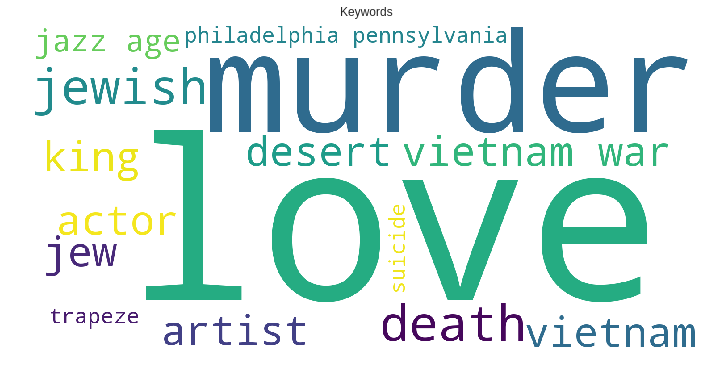

In [0]:
makeCloud(keyword_occurences[0:15],"Keywords","White")

* **Love, Murder, Death and Jewish** are the most frequent topic in Best Picture winning movies.

### Top 5 Best Picture winning genres

In [0]:
set_keywords = set()
for liste_keywords in winner['genres'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [0]:
## get genres_occurences
genres_occurences, dum = count_word(winner, 'genres', set_keywords)

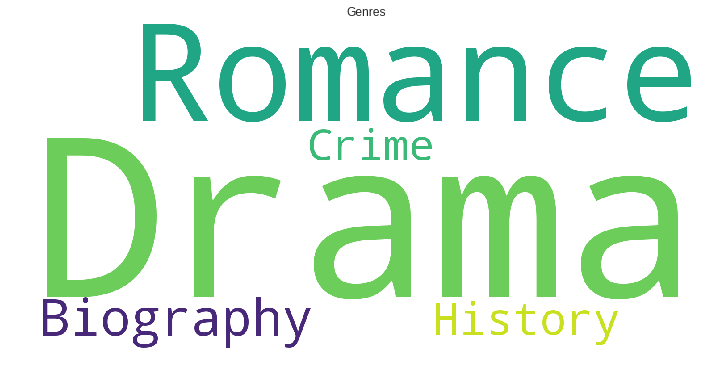

In [0]:
makeCloud(genres_occurences[0:5],"Genres","White")

* **Drama, Romance, Biography, History, Crime** are the most frequent genres in Best Picture winning movies.

### Nominated movie genres

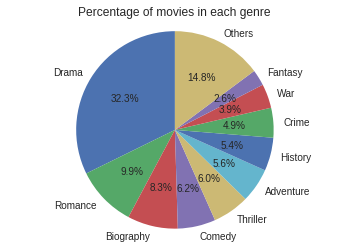

In [0]:
genre_count = {}
genre = []
for i in oscars_movie.genres:
	split_genre = list(map(str,i.split('|')))
	for j in split_genre:
		if j in genre:
			genre_count[j] = genre_count[j] + 1
		else:
			genre.append(j)
			genre_count[j] = 1
gen_series = pd.Series(genre_count)
# pi chart
gen_series = gen_series.sort_values(ascending = False)
label = list(map(str,gen_series[0:10].keys()))
label.append('Others')
gen = gen_series[0:10]
sum = 0
for i in gen_series[10:]:
    sum += i
gen['sum'] = sum
fig1, ax1 = plt.subplots()

ax1.pie(gen,labels = label, autopct = '%1.1f%%',startangle = 90)
ax1.axis('equal')
plt.title("Percentage of movies in each genre")
plt.show()


* **Drama, Romance, Biography** are the most frequent genres in the Best Picture nominations.
* Even though **Comedy, Thriller, Adventure** movies got nominated a lot, but they don't usually win Best Pictures.

### Top 10 directors in Oscars

In [0]:
def to_frequency_table(data):
    frequencytable = {}
    for key in data:
        if key in frequencytable:
            frequencytable[key] += 1
        else:
            frequencytable[key] = 1
    return frequencytable

In [0]:
director_dic = to_frequency_table(oscars_movie['director'])
director_list = list(director_dic.items())
director_list.sort(key=lambda tup: tup[1],reverse=True)

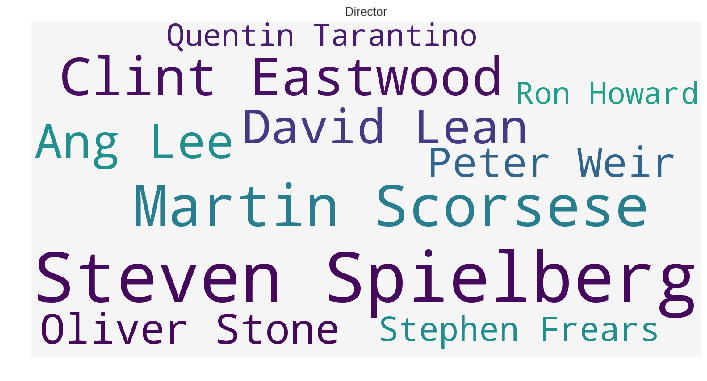

In [0]:
makeCloud(director_list[0:10],"Director","whitesmoke")

* **Steven Spielberg, Clint Eastwood, Martin Scorsese** have an important place in the Oscars.

### IMDB Score and Gross

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [0]:
import plotly.offline as py
import plotly.graph_objs as go
enable_plotly_in_cell()
trace1 = go.Scatter3d(
    x=oscars_movie["year"],
    y=oscars_movie["gross"],
    z=oscars_movie["imdb_score"],
    mode='markers',
    text=oscars_movie["movie"],
    marker=dict(
        size=12,
        color=oscars_movie["winner"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    showlegend=False,
  ##title='Movie',
  ##scene = dict(
      ##xaxis = dict(title='X: Year'),
      ##yaxis = dict(title='Y: Gross'),
      ##zaxis = dict(title='Z:IMDB Score')
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

X: Year

Y: Gross

Z:IMDB Score

Purple -> Nominee | Yellow -> Winner

*  Our dataset has more recent movie information.
* Winner movies seem to have a higher IMDB Score.
* Gross doesn't seem to have a signficant impact.

### Popularity

In [0]:
import plotly.offline as py
import plotly.graph_objs as go
enable_plotly_in_cell()
trace1 = go.Scatter3d(
    x=oscars_movie["movie_facebook_likes"],
    y=oscars_movie["cast_total_facebook_likes"],
    z=oscars_movie["num_voted_users"],
    mode='markers',
    text=oscars_movie["movie"],
    marker=dict(
        size=12,
        color=oscars_movie["winner"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    showlegend=False,
  ##title='Movie',
  ##scene = dict(
      ##xaxis = dict(title='X: Movie_facebook_likes'),
      ##yaxis = dict(title='Y: Cast_total_facebook_likes'),
      ##zaxis = dict(title='Z: Number of people who voted for the movie')
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

X: Movie_facebook_likes

Y: Cast_total_facebook_likes

Z: Number of people who voted for the movie

Purple -> Nominee | Yellow -> Winner

* Winners are not always so popluar.
* Winners actually have less attention on social media.

### Heatmap

In [0]:
df = oscars_movie.drop(['year','movie','director','language','country','genres','plot_keywords','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes'],axis=1)

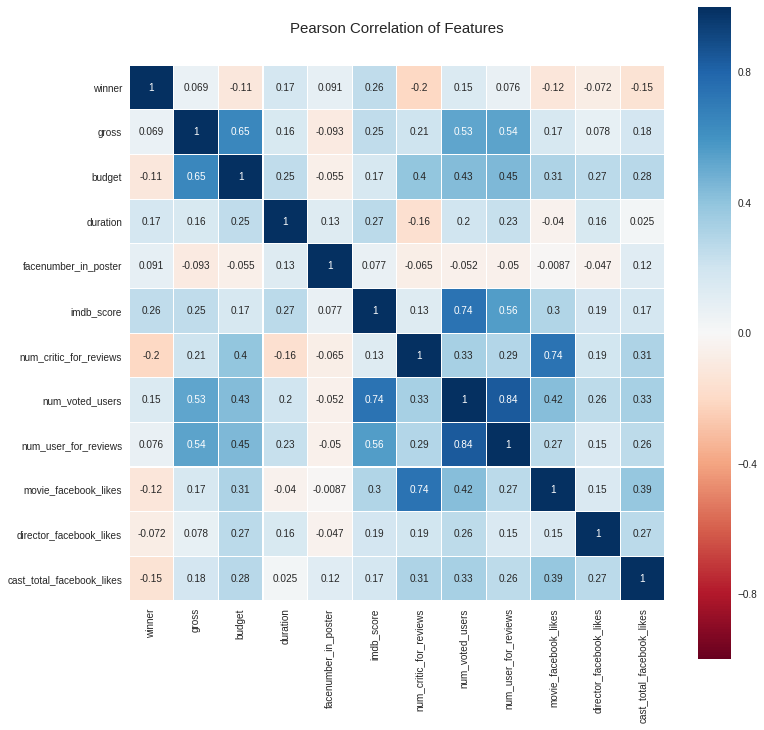

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

##Modeling

### Model preparation

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 12 columns):
winner                       186 non-null float64
gross                        186 non-null float64
budget                       186 non-null float64
duration                     186 non-null float64
facenumber_in_poster         186 non-null float64
imdb_score                   186 non-null float64
num_critic_for_reviews       186 non-null float64
num_voted_users              186 non-null float64
num_user_for_reviews         186 non-null float64
movie_facebook_likes         186 non-null float64
director_facebook_likes      186 non-null float64
cast_total_facebook_likes    186 non-null float64
dtypes: float64(12)
memory usage: 17.5 KB


In [0]:
X = df.drop('winner', axis = 1)
y = df['winner']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Modeling

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(n_estimators=50),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [0]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [0]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    y_pred = clf.predict_proba(X_test)
    ll = log_loss(y_test, y_pred)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 78.9474%
Log Loss: 2.151347451143487
SVC
****Results****
Accuracy: 76.3158%
Log Loss: 0.48511402307375456
DecisionTreeClassifier
****Results****
Accuracy: 78.9474%
Log Loss: 7.271321346296986
RandomForestClassifier
****Results****
Accuracy: 78.9474%
Log Loss: 0.5102649637694712
AdaBoostClassifier
****Results****
Accuracy: 71.0526%
Log Loss: 0.6120164257935357
GradientBoostingClassifier
****Results****
Accuracy: 78.9474%
Log Loss: 0.5586010079756165
GaussianNB
****Results****
Accuracy: 71.0526%
Log Loss: 0.644531173418392
LinearDiscriminantAnalysis
****Results****
Accuracy: 78.9474%
Log Loss: 0.5630888746146083
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 76.3158%
Log Loss: 1.0773759540080727


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



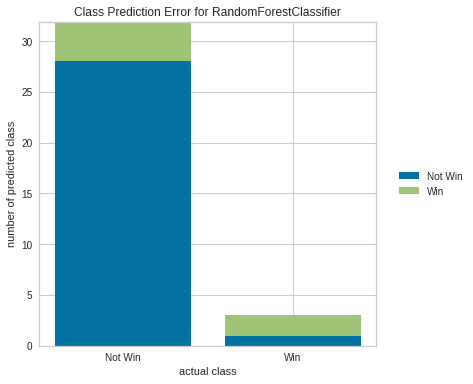

In [0]:
from yellowbrick.classifier import ClassPredictionError

classes = ['Not Win','Win']

visualizer = ClassPredictionError(
   RandomForestClassifier(), classes=classes
)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Draw visualization
g = visualizer.poof()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



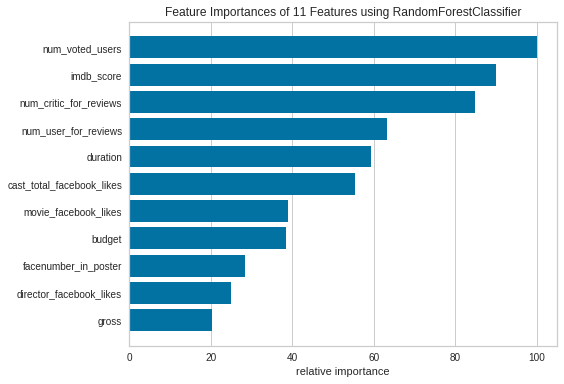

In [0]:
from yellowbrick.features.importances import FeatureImportances

fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(RandomForestClassifier(), ax=ax)
viz.fit(X, y)
viz.poof()

In [0]:
new = pd.read_csv('https://raw.githubusercontent.com/hazelliang/imdb/master/2019.csv')

In [0]:
new.head()

movie_title      gross    budget  duration  facenumber_in_poster  \
0  Bohemian Rhapsody  433000000  52000000       134                   1.0   
1     BlacKkKlansman   25592685  15000000       136                   1.0   
2     A Star Is Born  208108682  36000000       134                   2.0   
3      The Favourite   42544448  15000000       119                   3.0   
4         Green Book   42526091  23000000       130                   2.0   

   imdb_score  num_critic_for_reviews  num_voted_users  num_user_for_reviews  \
0         8.2                     381           234254                  2467   
1         7.5                     384           100962                   559   
2         7.9                     405           170266                  1933   
3         7.9                     596            44708                   340   
4         8.3                     469            53266                   283   

   movie_facebook_likes  director_facebook_likes  cast_total_facebook_likes  
0                537047                      557                     473671  
1                 82227                   759763                      24262  
2                296886                   115589                   59372559  
3                 27122                    10922                     117337  
4                 38793                     9389                     157068

In [0]:
X_new = new.drop('movie_title',axis=1)

In [0]:
rf = RandomForestClassifier()
rf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
result = rf.predict_proba(X_new)[:]

In [0]:
rf_result = pd.DataFrame(result[:,1])
rf_result['Movie'] = new.movie_title
max_result = max(rf_result[0])
rf_result['Predict'] = rf_result[0].map(lambda s: 1 if s == max_result  else 0)
rf_result

0              Movie  Predict
0  0.2  Bohemian Rhapsody        0
1  0.0     BlacKkKlansman        0
2  0.0     A Star Is Born        0
3  0.3      The Favourite        0
4  0.2         Green Book        0
5  0.4               Roma        1
6  0.2      Black Panther        0
7  0.0               Vice        0

## Conclusion

### Project Conclusion

* What kind of movies win Best Picture?

>* Movies about **Love, Murder, Death**.
>* **Dramas, Romances and Biopics**.
>* High IMDB score.

*  Do Best Picture winning movies also make money?

>* Most of Oscar movies make a dencent amount of money. But gross is not important of criteria.

*  Are Best Picture winners popular?

>* Compared to other nominated movies, winning movies get less attention from critics review but more from normal users.
>* Winning movies get less attention on social media compared to movie rating site.

* Is ROMA gonna win this year?  We will see! 


### Learning experience


*  Hard to find one dataset containing all the information you need. Merge different datasets to gain your desired data.
*  Switch between tools when stuck
*  Use visualizations to make the point, clear and fun!
*  Yellowbrick is a great tool. It simplifies a lot of processes.

### Improvement

* Fix 3D plot title issues.
* Think of a way to improve model accuracy
